In [1]:
import torch
from torchvision import models, transforms
import torch.nn as nn
import matplotlib.pylab as plt
%matplotlib inline
from _code.color_lib import RGBmean, RGBstdv
from _code.Reader import ImageReader
import numpy as np
from torch.utils.data.sampler import SequentialSampler

def eva(dsets, model):
    Fvecs = []
    dataLoader = torch.utils.data.DataLoader(dsets, batch_size=400, sampler=SequentialSampler(dsets), num_workers=48)
    torch.set_grad_enabled(False)
    model.eval()
    for data in dataLoader:
        inputs_bt, labels_bt = data # <FloatTensor> <LongTensor>
        fvec = model(inputs_bt.cuda())
        fvec = fvec.cpu()
        Fvecs.append(fvec)
            
    return torch.cat(Fvecs,0)

In [2]:
val_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(256),
                                      transforms.ToTensor(),
                                      transforms.Normalize(RGBmean['CUB'], RGBstdv['CUB'])])

data_dict = torch.load('/pless_nfs/home/datasets/CUB/data_dict_emb.pth')

def feature(src):
    model_para = torch.load(src+'model_params.pth')
    model = models.resnet18(pretrained=True)

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 64)
    model.avgpool = nn.AvgPool2d(8)

    model.load_state_dict(model_para,strict=True)
    
    traset = ImageReader(data_dict['tra'], None, val_transforms) 
    valset = ImageReader(data_dict['val'], None, val_transforms) 
    bacset = ImageReader({}, '/pless_nfs/home/datasets/Background_dst/Background/', val_transforms) 
    with torch.cuda.device(1):
        return eva(bacset, model.cuda()), eva(traset, model.cuda()), eva(valset, model.cuda())

In [4]:
bacvec,travec,valvec = feature(src='_result/EPSHN/CUB_R18/G8/0.0/')

([<matplotlib.axis.YTick at 0x7fea53d87320>,
 <a list of 3 Text yticklabel objects>)

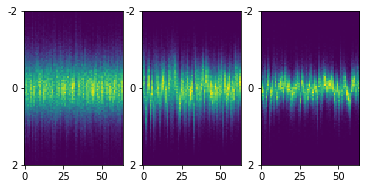

In [21]:
H = [torch.histc(travec[:,i], bins=101, min=-2, max=2)/travec.size(0) for i in range(64)]
plt.figure()
plt.subplot(1,3,1)
plt.imshow(torch.stack(H,1))
plt.yticks([0,50,100],[-2,0,2])

H = [torch.histc(valvec[:,i], bins=101, min=-2, max=2)/valvec.size(0) for i in range(64)]
plt.subplot(1,3,2)
plt.imshow(torch.stack(H,1))
plt.yticks([0,50,100],[-2,0,2])

H = [torch.histc(bacvec[:,i], bins=101, min=-2, max=2)/bacvec.size(0) for i in range(64)]
plt.subplot(1,3,3)
plt.imshow(torch.stack(H,1))
plt.yticks([0,50,100],[-2,0,2])

In [3]:
bacvec,travec,valvec = feature(src='_result/EPSHN/CUB_R18/G8/0.1_bt64_w0.1_lr1e-2/')

([<matplotlib.axis.YTick at 0x7fa96fa4c400>,
 <a list of 3 Text yticklabel objects>)

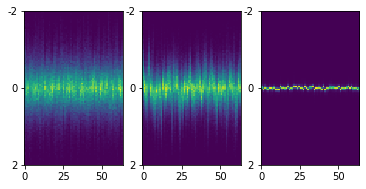

In [4]:
H = [torch.histc(travec[:,i], bins=101, min=-2, max=2)/travec.size(0) for i in range(64)]
plt.figure()
plt.subplot(1,3,1)
plt.imshow(torch.stack(H,1))
plt.yticks([0,50,100],[-2,0,2])

H = [torch.histc(valvec[:,i], bins=101, min=-2, max=2)/valvec.size(0) for i in range(64)]
plt.subplot(1,3,2)
plt.imshow(torch.stack(H,1))
plt.yticks([0,50,100],[-2,0,2])

H = [torch.histc(bacvec[:,i], bins=101, min=-2, max=2)/bacvec.size(0) for i in range(64)]
plt.subplot(1,3,3)
plt.imshow(torch.stack(H,1))
plt.yticks([0,50,100],[-2,0,2])